In [2]:
import numpy
import math
import h5py
import pandas as pd
from pandas import read_csv
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.models import Sequential
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

from keras.layers import Dense, Dropout, Activation, Flatten, Embedding, SimpleRNN
from keras.layers import Convolution1D, Convolution2D, MaxPooling1D, MaxPooling2D

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Single Input

## 1. Model 1 - 1D

In [4]:
noise_level = []
for j in range(1, 28, 1):
    noise_level1 = []
    for i in range(j,2026,27):
        noise_level1.append(i)
    noise_level.append(noise_level1)

In [5]:
numpy.shape(noise_level)

(27, 75)

In [7]:
#i = 0
#j = 0

i = 26
j = 10
M1 = read_csv('Path/y%d.csv'%noise_level[i][j], header = None)
R1 = read_csv('Path/a%d.csv'%noise_level[i][j], header = None)

M1 = M1.T
R1 = R1.T
M1 = M1.values[:,0] # NOISY
R1 = R1.values[:,0] # NOISELESS

M1 = M1.astype('float32')
R1 = R1.astype('float32')

#plt.plot(M1)
#plt.plot(R1)

# scaler = MinMaxScaler(feature_range=(0, 1))
# M_r= scaler.fit_transform(M)
# R_r = scaler.fit_transform(R)

M1_r= M1
R1_r = R1

column = 10

# split by column
print(len(M1))
M1_r = numpy.reshape(M1_r,(int(len(M1)/column),column))
R1_r = numpy.reshape(R1_r,(int(len(R1)/column),column))


# split into train and test sets
train_size1 = int(len(M1_r) * 0.8) #0.67
test_size1 = len(M1_r) - train_size1

trainN1, testN1 = M1_r[0:train_size1], M1_r[train_size1:len(M1_r)]
trainC1, testC1 = R1_r[0:train_size1], R1_r[train_size1:len(R1_r)]
print('trainN_Shape', numpy.shape(trainN1))
print('testN_Shape', numpy.shape(testN1))

trainC1  = numpy.reshape(trainC1, (train_size1, 1, column))
trainN1  = numpy.reshape(trainN1, (train_size1, 1, column))
testC1  = numpy.reshape(testC1, (test_size1, 1, column))
testN1  = numpy.reshape(testN1, (test_size1, 1, column))
print('trainN_reShape', numpy.shape(trainN1))
print('testN_reShape', numpy.shape(testN1))


1000
('trainN_Shape', (80, 10))
('testN_Shape', (20, 10))
('trainN_reShape', (80, 1, 10))
('testN_reShape', (20, 1, 10))


In [20]:
numpy.random.seed(2)
model1 = Sequential()
model1.add(Dense(column, input_shape=(1, column), kernel_initializer='normal', activation='linear'))
model1.add(Dense(80, kernel_initializer='normal', activation='linear')) #
model1.add(Dense(10, kernel_initializer='normal', activation='linear'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1, 10)             110       
_________________________________________________________________
dense_5 (Dense)              (None, 1, 80)             880       
_________________________________________________________________
dense_6 (Dense)              (None, 1, 10)             810       
Total params: 1,800
Trainable params: 1,800
Non-trainable params: 0
_________________________________________________________________


In [21]:
model1.compile(loss='mean_squared_error', optimizer='adam')
history1 = model1.fit(trainN1, trainC1, epochs=200, batch_size=800, verbose =0 )

Text(0.5,0,u'epochs')

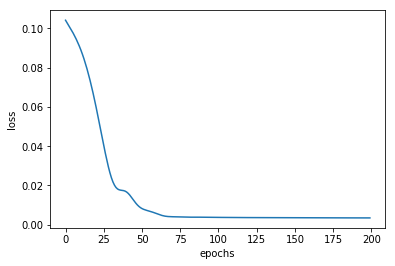

In [22]:
plt.plot(history1.history['loss'])
plt.ylabel('loss')
plt.xlabel('epochs')

In [23]:
trainPredict1 = model1.predict(trainN1)
testPredict1 = model1.predict(testN1)

In [413]:
testC1  = numpy.reshape(testC1, (test_size*column, 1))
testN1  = numpy.reshape(testN1, (test_size*column, 1))
testPredict1 = numpy.reshape(testPredict1, (test_size*column, 1))

trainC1  = numpy.reshape(trainC1, (train_size*column, 1))
trainN1  = numpy.reshape(trainN1, (train_size*column, 1))
trainPredict1 = numpy.reshape(trainPredict1, (train_size*column, 1))

print('trainN_Shape', numpy.shape(trainN1))
print('testN_Shape', numpy.shape(testN1))
print('trainPredict_Shape', numpy.shape(trainPredict1))
print('testredict_Shape', numpy.shape(testPredict1))

('trainN_Shape', (800, 1))
('testN_Shape', (200, 1))
('trainPredict_Shape', (800, 1))
('testredict_Shape', (200, 1))


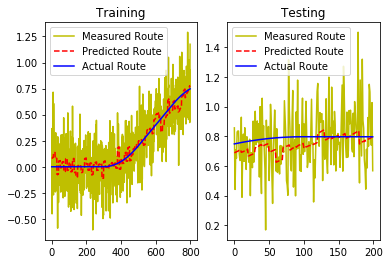

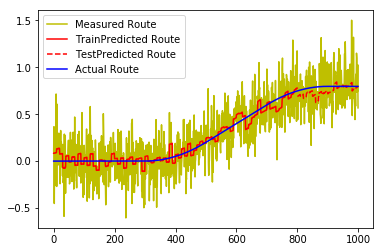

In [414]:
plt.subplot(1,2,1)

plt.plot(trainN1,'y')
plt.plot(trainPredict1,'r--')
plt.plot(trainC1,'b')
plt.legend(['Measured Route','Predicted Route','Actual Route'])
plt.title('Training')

plt.subplot(1,2,2)

plt.plot(testN1,'y')
plt.plot(testPredict1,'r--')
plt.plot(testC1,'b')
plt.legend(['Measured Route','Predicted Route', 'Actual Route'])
plt.title('Testing')
plt.show()

trainPredictPlot1 = numpy.empty_like(numpy.transpose([R1])) #shape of (1000,1)
trainPredictPlot1[:] = numpy.nan

trainPredictPlot1[0:len(trainPredict1)] = trainPredict1
# shift test predictions for plotting
testPredictPlot1 = numpy.empty_like(numpy.transpose([R1]))
testPredictPlot1[:] = numpy.nan
testPredictPlot1[len(trainPredict1):len(R1)] = testPredict1


plt.plot(M1,'y')#Noisy
plt.plot(trainPredictPlot1,'r')
plt.plot(testPredictPlot1,'r--')
plt.plot(R1,'b')#Noiseless

plt.legend(['Measured Route','TrainPredicted Route','TestPredicted Route','Actual Route'])
plt.show()

In [415]:
# MSE scores after Training
trainScore1 = mean_squared_error(trainC1, trainPredict1)
print('Train Score: %.4f MSE' % (trainScore1))
testScore1 = mean_squared_error(testC1, testPredict1)
print('Test Score: %.4f MSE' % (testScore1))

Train Score: 0.0034 MSE
Test Score: 0.0037 MSE


In [416]:
# Original MSE scores
otrainScore1 = mean_squared_error(trainC1, trainN1)
print('Train Score: %.4f MSE' % (otrainScore1))
otestScore1 = mean_squared_error(testC, testN)
print('Test Score: %.4f MSE' % (otestScore1))

Train Score: 0.0397 MSE
Test Score: 0.0606 MSE


## Model 2 - 3D

In [8]:
#i = 0
#j = 0

i = 26
j = 10
M2 = read_csv('Path/y%d.csv'%noise_level[i][j], header = None)
R2 = read_csv('Path/a%d.csv'%noise_level[i][j], header = None)
M2 = M2.T
R2 = R2.T
M2 = M2.values # NOISY
R2 = R2.values # NOISELESS

M2 = M2.astype('float32')
R2 = R2.astype('float32')

# scaler = MinMaxScaler(feature_range=(0, 1))
# M_r= scaler.fit_transform(M)
# R_r = scaler.fit_transform(R)

print('trainN_Shape', numpy.shape(M2))
print('testN_Shape', numpy.shape(R2))

M2_r= M2
R2_r = R2

# split by column
column = 10

M2_r = numpy.reshape(M2_r,(int(len(M2)/column),3, column))
R2_r = numpy.reshape(R2_r,(int(len(R2)/column),3, column))

# split into train and test sets
train_size2 = int(len(M2_r) * 0.8)
test_size2 = len(M2_r) - train_size2

trainN2, testN2 = M2_r[0:train_size2], M2_r[train_size2:len(M2_r)]
trainC2, testC2 = R2_r[0:train_size2], R2_r[train_size2:len(R2_r)]

print('trainN_Shape', numpy.shape(trainN2))
print('testN_Shape', numpy.shape(testN2))

('trainN_Shape', (1000, 3))
('testN_Shape', (1000, 3))
('trainN_Shape', (80, 3, 10))
('testN_Shape', (20, 3, 10))


In [24]:
numpy.random.seed(2)
model2 = Sequential()
model2.add(Dense(column, input_shape=(3, column), kernel_initializer='normal', activation='linear'))
#model1.add(Dense(40, kernel_initializer='normal', activation='linear'))
model2.add(Dense(80, kernel_initializer='normal', activation='linear'))
model2.add(Dense(80, kernel_initializer='normal', activation='linear'))
model2.add(Dense(10, kernel_initializer='normal', activation='linear'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 3, 10)             110       
_________________________________________________________________
dense_8 (Dense)              (None, 3, 80)             880       
_________________________________________________________________
dense_9 (Dense)              (None, 3, 80)             6480      
_________________________________________________________________
dense_10 (Dense)             (None, 3, 10)             810       
Total params: 8,280
Trainable params: 8,280
Non-trainable params: 0
_________________________________________________________________


In [25]:
model2.compile(loss='mean_squared_error', optimizer='adam')
history2 = model2.fit(trainN2, trainC2, epochs=200, batch_size=200, verbose =0 )

Text(0,0.5,u'loss')

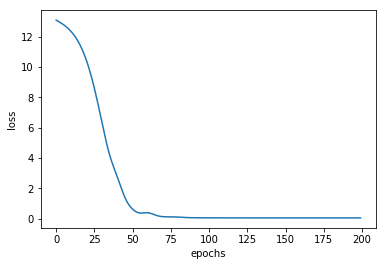

In [26]:
plt.plot(history2.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [27]:
trainPredict2 = model2.predict(trainN2)
testPredict2 = model2.predict(testN2)

In [422]:
testC2  = numpy.reshape(testC2, (test_size2*column, 3))
testN2  = numpy.reshape(testN2, (test_size2*column, 3))
testPredict2 = numpy.reshape(testPredict2, (test_size2*column, 3))

trainC2  = numpy.reshape(trainC2, (train_size2*column, 3))
trainN2  = numpy.reshape(trainN2, (train_size2*column, 3))
trainPredict2 = numpy.reshape(trainPredict2, (train_size2*column, 3))

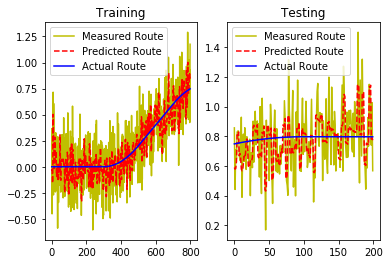

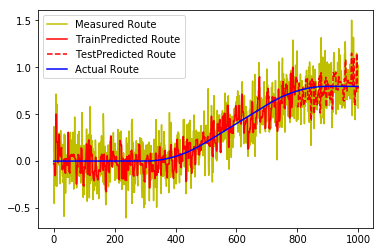

In [423]:
plt.subplot(1,2,1)

plt.plot(trainN2[:,0],'y')
plt.plot(trainPredict2[:,0],'r--')
plt.plot(trainC2[:,0],'b')
plt.legend(['Measured Route','Predicted Route','Actual Route'])
plt.title('Training')

plt.subplot(1,2,2)

plt.plot(testN2[:,0],'y')
plt.plot(testPredict2[:,0],'r--')
plt.plot(testC2[:,0],'b')
plt.legend(['Measured Route','Predicted Route', 'Actual Route'])
plt.title('Testing')
plt.show()

trainPredictPlot2 = numpy.empty_like(R2[:,0])
trainPredictPlot2[:] = numpy.nan
trainPredictPlot2[0:len(trainPredict2)] = trainPredict2[:,0]
# shift test predictions for plotting
testPredictPlot2 = numpy.empty_like(R2[:,0])
testPredictPlot2[:] = numpy.nan
testPredictPlot2[len(trainPredict2):len(R2)] = testPredict2[:,0]


plt.plot(M2[:,0],'y')#Noisy
plt.plot(trainPredictPlot2,'r')
plt.plot(testPredictPlot2,'r--')
plt.plot(R2[:,0],'b')#Noiseless

plt.legend(['Measured Route','TrainPredicted Route','TestPredicted Route','Actual Route'])
plt.show()

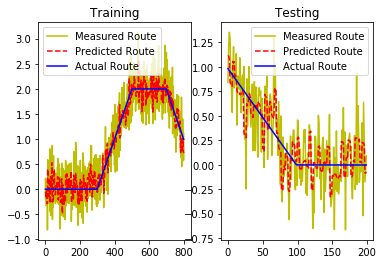

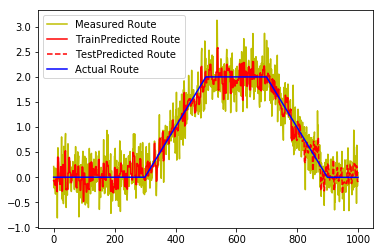

In [424]:
plt.subplot(1,2,1)

plt.plot(trainN2[:,1],'y')
plt.plot(trainPredict2[:,1],'r--')
plt.plot(trainC2[:,1],'b')
plt.legend(['Measured Route','Predicted Route','Actual Route'])
plt.title('Training')

plt.subplot(1,2,2)

plt.plot(testN2[:,1],'y')
plt.plot(testPredict2[:,1],'r--')
plt.plot(testC2[:,1],'b')
plt.legend(['Measured Route','Predicted Route', 'Actual Route'])
plt.title('Testing')
plt.show()

trainPredictPlot2 = numpy.empty_like(R2[:,1])
trainPredictPlot2[:] = numpy.nan
trainPredictPlot2[0:len(trainPredict2)] = trainPredict2[:,1]
# shift test predictions for plotting
testPredictPlot2 = numpy.empty_like(R2[:,1])
testPredictPlot2[:] = numpy.nan
testPredictPlot2[len(trainPredict2):len(R2)] = testPredict2[:,1]


plt.plot(M2[:,1],'y')#Noisy
plt.plot(trainPredictPlot2,'r')
plt.plot(testPredictPlot2,'r--')
plt.plot(R2[:,1],'b')#Noiseless

plt.legend(['Measured Route','TrainPredicted Route','TestPredicted Route','Actual Route'])
plt.show()

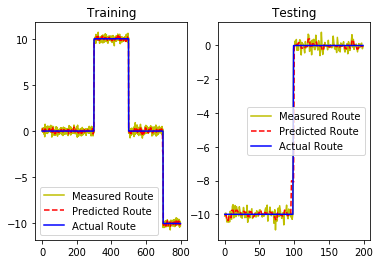

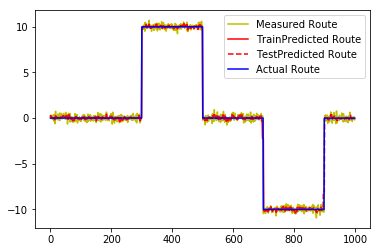

In [425]:
plt.subplot(1,2,1)

plt.plot(trainN2[:,2],'y')
plt.plot(trainPredict2[:,2],'r--')
plt.plot(trainC2[:,2],'b')
plt.legend(['Measured Route','Predicted Route','Actual Route'])
plt.title('Training')

plt.subplot(1,2,2)

plt.plot(testN2[:,2],'y')
plt.plot(testPredict2[:,2],'r--')
plt.plot(testC2[:,2],'b')
plt.legend(['Measured Route','Predicted Route', 'Actual Route'])
plt.title('Testing')
plt.show()

trainPredictPlot2 = numpy.empty_like(R2[:,2])
trainPredictPlot2[:] = numpy.nan
trainPredictPlot2[0:len(trainPredict2)] = trainPredict2[:,2]
# shift test predictions for plotting
testPredictPlot2 = numpy.empty_like(R2[:,2])
testPredictPlot2[:] = numpy.nan
testPredictPlot2[len(trainPredict2):len(R2)] = testPredict2[:,2]


plt.plot(M2[:,2],'y')#Noisy
plt.plot(trainPredictPlot2,'r')
plt.plot(testPredictPlot2,'r--')
plt.plot(R2[:,2],'b')#Noiseless

plt.legend(['Measured Route','TrainPredicted Route','TestPredicted Route','Actual Route'])
plt.show()

In [426]:
# MSE scores after Training
trainScore2 = mean_squared_error(trainC2[:,0], trainPredict2[:,0])
print('Train Score: %.4f MSE' % (trainScore2))
testScore2 = mean_squared_error(testC2[:,0], testPredict2[:,0])
print('Test Score: %.4f MSE' % (testScore2))

Train Score: 0.0168 MSE
Test Score: 0.0192 MSE


In [427]:
# Original MSE scores
otrainScore2 = mean_squared_error(trainC2[:,0], trainN2[:,0])
print('Train Score: %.4f MSE' % (otrainScore1))
otestScore2 = mean_squared_error(testC2[:,0], testN2[:,0])
print('Test Score: %.4f MSE' % (otestScore2))

Train Score: 0.0397 MSE
Test Score: 0.0406 MSE


## Model 3 - 3D

## Randomly Choosing Training and Testing Sets

In [10]:
# Selecting training and testing datasets
import random
full_index = [i for i in range(1,2026)]
index = []
while len(index) < 405:
    temp = random.randint(1, 2025)
    if temp not in index:
        index.append(temp)      #index: test
    if temp in full_index:
        full_index.remove(temp) # full_index: training

## Number of Columns 

In [11]:
column = 10

In [12]:
## Get training dataset
# noisy
X = read_csv('Path/y%d.csv'%full_index[0], header = None)
X = X.T
X = X.values
X = numpy.reshape(X,(int(numpy.shape(X)[0]/column),3,column))

# noiseless
Y = read_csv('Path/a%d.csv'%full_index[0], header = None)
Y = Y.T
Y = Y.values
Y = numpy.reshape(Y,(int(numpy.shape(Y)[0]/column),3,column))

for num in full_index[1:]:
    X_read = read_csv('Path/' + 'y%d.csv'%num, header = None)
    X_read = X_read.T
    X_read = X_read.values
    X_read = numpy.reshape(X_read,(int(numpy.shape(X_read)[0]/column),3,column))
    X = numpy.concatenate((X, X_read), axis=0)
    #X = pd.concat([X,X_read], axis = 1)

    Y_read = read_csv('Path/' + 'a%d.csv'%num, header = None)
    Y_read = Y_read.T
    Y_read = Y_read.values
    Y_read = numpy.reshape(Y_read,(int(numpy.shape(Y_read)[0]/column),3,column))
    Y = numpy.concatenate((Y, Y_read), axis=0)
    #Y = pd.concat([Y,Y_read], axis = 1)

In [13]:
## Get test dataset
# noisy
X_test = read_csv('Path/y%d.csv'%index[0], header = None)
X_test = X_test.T
X_test = X_test.values
X_test = numpy.reshape(X_test,(int(numpy.shape(X_test)[0]/column),3,column))

# noiseless
Y_test = read_csv('Path/a%d.csv'%index[0], header = None)
Y_test = Y_test.T
Y_test = Y_test.values
Y_test = numpy.reshape(Y_test,(int(numpy.shape(Y_test)[0]/column),3,column))

for num in index[1:]:
    X_read = read_csv('Path/' + 'y%d.csv'%num, header = None)
    X_read = X_read.T
    X_read = X_read.values
    X_read = numpy.reshape(X_read,(int(numpy.shape(X_read)[0]/column),3,column))
    X_test = numpy.concatenate((X_test, X_read), axis=0)
    #X_test = pd.concat([X_test,X_read], axis = 1)
    Y_read = read_csv('Path/' + 'a%d.csv'%num, header = None)
    Y_read = Y_read.T
    Y_read = Y_read.values
    Y_read = numpy.reshape(Y_read,(int(numpy.shape(Y_read)[0]/column),3,column))
    Y_test = numpy.concatenate((Y_test, Y_read), axis=0)
    #Y_test = pd.concat([Y_test,Y_read], axis = 1)

In [32]:
numpy.random.seed(2)
model3 = Sequential()
model3.add(Dense(column, input_shape=(3, column), kernel_initializer='normal', activation='linear'))
model3.add(Dense(80, kernel_initializer='normal', activation='linear'))
model3.add(Dense(80, kernel_initializer='normal', activation='linear'))
model3.add(Dense(100, kernel_initializer='normal', activation='linear'))
model3.add(Dense(100, kernel_initializer='normal', activation='linear'))
model3.add(Dense(80, kernel_initializer='normal', activation='linear'))
model3.add(Dense(80, kernel_initializer='normal', activation='linear'))
model3.add(Dense(40, kernel_initializer='normal', activation='linear'))
model3.add(Dense(40, kernel_initializer='normal', activation='linear'))
model3.add(Dense(column, kernel_initializer='normal', activation='linear'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 3, 10)             110       
_________________________________________________________________
dense_12 (Dense)             (None, 3, 80)             880       
_________________________________________________________________
dense_13 (Dense)             (None, 3, 80)             6480      
_________________________________________________________________
dense_14 (Dense)             (None, 3, 100)            8100      
_________________________________________________________________
dense_15 (Dense)             (None, 3, 100)            10100     
_________________________________________________________________
dense_16 (Dense)             (None, 3, 80)             8080      
_________________________________________________________________
dense_17 (Dense)             (None, 3, 80)             6480      
__________

In [33]:
model3.compile(loss='mean_squared_error', optimizer='adam')
history3 = model3.fit(X, Y, epochs=200, batch_size=200, verbose =0)

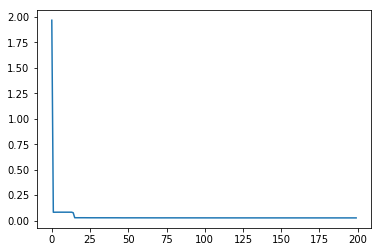

In [439]:
plt.plot(history3.history['loss'])

In [ ]:
model3.save_weights('generalmodel.h5')

## Results

## Model 1

In [35]:
result = []
for j in range(len(noise_level[0])): #
    result1 = []
    #print('j', j)
    for i in range(len(noise_level)): #
        #print('i', i)
        M = read_csv('Path/y%d.csv'%noise_level[i][j], header = None)
        R = read_csv('Path/a%d.csv'%noise_level[i][j], header = None)
        M = M.T
        R = R.T
        M = M.values[:,0] # NOISY
        R = R.values[:,0] # NOISELESS

        M = M.astype('float32')
        R = R.astype('float32')

        # scaler = MinMaxScaler(feature_range=(0, 1))
        # M_r= scaler.fit_transform(M)
        # R_r = scaler.fit_transform(R)
        
        #M = numpy.transpose([M])
        #R = numpy.transpose([R])

        M_r= M
        R_r = R

        column = 10

        M_r = numpy.reshape(M_r,(int(len(M)/column),column))
        R_r = numpy.reshape(R_r,(int(len(R)/column),column))

        # split into train and test sets
        train_size = int(len(M_r) * 0.8) #0.67
        test_size = len(M_r) - train_size

        trainN, testN = M_r[0:train_size], M_r[train_size:len(M_r)]
        trainC, testC = R_r[0:train_size], R_r[train_size:len(R_r)]
        
        trainC  = numpy.reshape(trainC, (train_size, 1, column))
        trainN  = numpy.reshape(trainN, (train_size, 1, column))
        testC  = numpy.reshape(testC, (test_size, 1, column))
        testN  = numpy.reshape(testN, (test_size, 1, column))
        
        history_g1 = model1.fit(trainN, trainC, epochs=200, batch_size=200, verbose = 0)
        
        trainPredict = model1.predict(trainN)
        testPredict = model1.predict(testN)
        
        testC  = numpy.reshape(testC, (test_size*column, 1))
        testN  = numpy.reshape(testN, (test_size*column, 1))
        testPredict = numpy.reshape(testPredict, (test_size*column, 1))

        trainC  = numpy.reshape(trainC, (train_size*column, 1))
        trainN  = numpy.reshape(trainN, (train_size*column, 1))
        trainPredict = numpy.reshape(trainPredict, (train_size*column, 1))
        
        trainScore_1 = mean_squared_error(trainC[:], trainPredict[:])
        testScore_1 = mean_squared_error(testC[:], testPredict[:])
        
        trainScore_2 = mean_squared_error(trainC[:], trainN[:])
        testScore_2 = mean_squared_error(testC[:], testN[:])
    
        result1.append(testScore_2/testScore_1)
        #print('result1', result1)
    result.append(result1)
        
        

In [367]:
result = pd.DataFrame(result)
result.to_csv("generalmodel1.csv")

In [368]:
result = pd.read_csv("generalmodel1.csv", header = 0, index_col = ['Unnamed: 0'])

In [369]:
val = result.mean(axis = 0).values

In [371]:
names = ['0.02-0.08-0.05', '0.02-0.08-0.06', '0.02-0.08-0.07', '0.02-0.09-0.05', '0.02-0.09-0.06', '0.02-0.09-0.07', '0.02-0.1-0.05', '0.02-0.1-0.06', '0.02-0.1-0.07', '0.03-0.08-0.05', '0.03-0.08-0.06', '0.03-0.08-0.07', '0.03-0.09-0.05', '0.03-0.09-0.06', '0.03-0.09-0.07', '0.03-0.1-0.05', '0.03-0.1-0.06', '0.03-0.1-0.07','0.04-0.08-0.05', '0.04-0.08-0.06', '0.04-0.08-0.07', '0.04-0.09-0.05', '0.04-0.09-0.06', '0.04-0.09-0.07','0.04-0.1-0.05', '0.04-0.1-0.06', '0.04-0.1-0.07']

Text(0,0.5,u'The Factor of Enhancement on MSE Error')

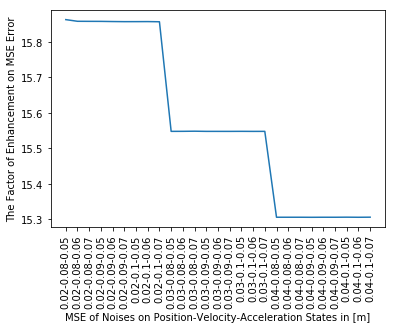

In [372]:
x = numpy.arange(27)
plt.plot(x, val)
plt.xticks(x, names, rotation='vertical')
plt.xlabel('MSE of Noises on Position-Velocity-Acceleration States in [m]')
plt.ylabel('The Factor of Enhancement on MSE Error')

# Model 2

In [ ]:
result2 = []
for j in range(len(noise_level[0])):
    result1 = []
    for i in range(len(noise_level)):
        M = read_csv('Path/y%d.csv'%noise_level[i][j], header = None)
        R = read_csv('Path/a%d.csv'%noise_level[i][j], header = None)
        M = M.T
        R = R.T
        M = M.values[:] # NOISY
        R = R.values[:] # NOISELESS

        M = M.astype('float32')
        R = R.astype('float32')

        # scaler = MinMaxScaler(feature_range=(0, 1))
        # M_r= scaler.fit_transform(M)
        # R_r = scaler.fit_transform(R)

        M_r= M
        R_r = R

        column = 10

        M_r = numpy.reshape(M_r,(int(len(M)/column),3,column))
        R_r = numpy.reshape(R_r,(int(len(R)/column),3,column))

        # split into train and test sets
        train_size = int(len(M_r) * 0.8) #0.67
        test_size = len(M_r) - train_size

        trainN, testN = M_r[0:train_size], M_r[train_size:len(M_r)]
        trainC, testC = R_r[0:train_size], R_r[train_size:len(R_r)]
        
        history_g2 = model2.fit(trainN, trainC, epochs=200, batch_size=200, verbose = 0)
        
        trainPredict = model2.predict(trainN)
        testPredict = model2.predict(testN)
        
        testC  = numpy.reshape(testC, (test_size*column, 3))
        testN  = numpy.reshape(testN, (test_size*column, 3))
        testPredict = numpy.reshape(testPredict, (test_size*column, 3))

        trainC  = numpy.reshape(trainC, (train_size*column, 3))
        trainN  = numpy.reshape(trainN, (train_size*column, 3))
        trainPredict = numpy.reshape(trainPredict, (train_size*column, 3))
        
        trainScore_1 = mean_squared_error(trainC[:,0], trainPredict[:,0])
        testScore_1 = mean_squared_error(testC[:,0], testPredict[:,0])
        
        trainScore_2 = mean_squared_error(trainC[:,0], trainN[:,0])
        testScore_2 = mean_squared_error(testC[:,0], testN[:,0])
    
        result1.append(testScore_2/testScore_1)
        #print('length', len(result1))
    result2.append(result1)
        
        

In [375]:
result2 = pd.DataFrame(result2)
result2.to_csv("generalmodel2.csv")

In [376]:
result2 = pd.read_csv("generalmodel2.csv", header = 0, index_col = ['Unnamed: 0'])

In [377]:
val2 = result2.mean(axis = 0).values

In [378]:
names = ['0.02-0.08-0.05', '0.02-0.08-0.06', '0.02-0.08-0.07', '0.02-0.09-0.05', '0.02-0.09-0.06', '0.02-0.09-0.07', '0.02-0.1-0.05', '0.02-0.1-0.06', '0.02-0.1-0.07', '0.03-0.08-0.05', '0.03-0.08-0.06', '0.03-0.08-0.07', '0.03-0.09-0.05', '0.03-0.09-0.06', '0.03-0.09-0.07', '0.03-0.1-0.05', '0.03-0.1-0.06', '0.03-0.1-0.07','0.04-0.08-0.05', '0.04-0.08-0.06', '0.04-0.08-0.07', '0.04-0.09-0.05', '0.04-0.09-0.06', '0.04-0.09-0.07','0.04-0.1-0.05', '0.04-0.1-0.06', '0.04-0.1-0.07']

Text(0,0.5,u'The Factor of Enhancement on MSE Error')

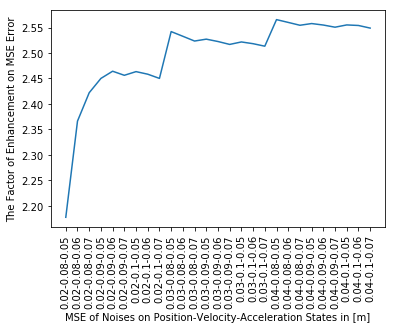

In [379]:
x = numpy.arange(27)
plt.plot(x, val2)
plt.xticks(x, names, rotation='vertical')
plt.xlabel('MSE of Noises on Position-Velocity-Acceleration States in [m]')
plt.ylabel('The Factor of Enhancement on MSE Error')

# Model 3

In [380]:
model3.load_weights('generalmodel.h5')

In [ ]:
i = 26
j = 26
result3 = []
for j in range(len(noise_level[0])):
    result1 = []
    for i in range(len(noise_level)):
        M = read_csv('Path/y%d.csv'%noise_level[i][j], header = None)
        R = read_csv('Path/a%d.csv'%noise_level[i][j], header = None)
        M = M.T
        R = R.T
        M = M.values[:] # NOISY
        R = R.values[:] # NOISELESS

        M = M.astype('float32')
        R = R.astype('float32')

        # scaler = MinMaxScaler(feature_range=(0, 1))
        # M_r= scaler.fit_transform(M)
        # R_r = scaler.fit_transform(R)

        M_r= M
        R_r = R

        column = 10

        M_r = numpy.reshape(M_r,(int(len(M)/column),3,column))
        R_r = numpy.reshape(R_r,(int(len(R)/column),3,column))

        # split into train and test sets
        train_size = int(len(M_r) * 0.8) #0.67
        test_size = len(M_r) - train_size

        trainN, testN = M_r[0:train_size], M_r[train_size:len(M_r)]
        trainC, testC = R_r[0:train_size], R_r[train_size:len(R_r)]
        
        trainPredict = model3.predict(trainN)
        testPredict = model3.predict(testN)
        
        testC  = numpy.reshape(testC, (test_size*column, 3))
        testN  = numpy.reshape(testN, (test_size*column, 3))
        testPredict = numpy.reshape(testPredict, (test_size*column, 3))

        trainC  = numpy.reshape(trainC, (train_size*column, 3))
        trainN  = numpy.reshape(trainN, (train_size*column, 3))
        trainPredict = numpy.reshape(trainPredict, (train_size*column, 3))
        
        trainScore_13 = mean_squared_error(trainC[:,0], trainPredict[:,0])
        testScore_13 = mean_squared_error(testC[:,0], testPredict[:,0])
        
        trainScore_3 = mean_squared_error(trainC[:,0], trainN[:,0])
        testScore_3 = mean_squared_error(testC[:,0], testN[:,0])
    
        result1.append(testScore_3/testScore_13)
    #print('j', j)
    result3.append(result1)
        
        

In [399]:
result3 = pd.DataFrame(result3)
result3.to_csv("model3.csv")

In [400]:
result3 = pd.read_csv("model3.csv", header = 0, index_col = ['Unnamed: 0'])

In [401]:
val3 = result3.mean(axis = 0).values

In [402]:
names = ['0.02-0.08-0.05', '0.02-0.08-0.06', '0.02-0.08-0.07', '0.02-0.09-0.05', '0.02-0.09-0.06', '0.02-0.09-0.07', '0.02-0.1-0.05', '0.02-0.1-0.06', '0.02-0.1-0.07', '0.03-0.08-0.05', '0.03-0.08-0.06', '0.03-0.08-0.07', '0.03-0.09-0.05', '0.03-0.09-0.06', '0.03-0.09-0.07', '0.03-0.1-0.05', '0.03-0.1-0.06', '0.03-0.1-0.07','0.04-0.08-0.05', '0.04-0.08-0.06', '0.04-0.08-0.07', '0.04-0.09-0.05', '0.04-0.09-0.06', '0.04-0.09-0.07','0.04-0.1-0.05', '0.04-0.1-0.06', '0.04-0.1-0.07']

Text(0,0.5,u'The Factor of Enhancement on MSE Error')

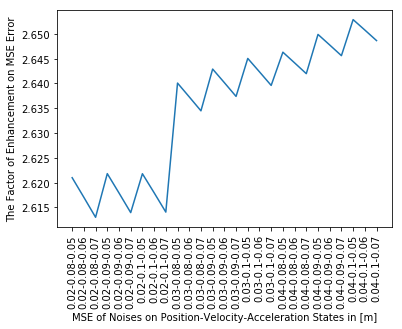

In [403]:
x = numpy.arange(27)
plt.plot(x, val3)
plt.xticks(x, names, rotation='vertical')
plt.xlabel('MSE of Noises on Position-Velocity-Acceleration States in [m]')
plt.ylabel('The Factor of Enhancement on MSE Error')